# Аналитика в авиакомпании
# Описание проекта
Вы аналитик российской авиакомпании F9, которая выполняет внутренние пассажирские перевозки. Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
# Описание данных
**Таблица airports — информация об аэропортах:**
airport_code — трёхбуквенный код аэропорта
airport_name — название аэропорта
city — город
timezone — временная зона

**Таблица aircrafts — информация о самолётах:**
aircraft_code — код модели самолёта
model — модель самолёта
range — количество самолётов

**Таблица tickets — информация о билетах:**
ticket_no — уникальный номер билета
passenger_id — персональный идентификатор пассажира
passenger_name — имя и фамилия пассажира

**Таблица flights — информация о рейсах:**
flight_id — уникальный идентификатор рейса
departure_airport — аэропорт вылета
departure_time — дата и время вылета
arrival_airport — аэропорт прилёта
arrival_time — дата и время прилёта
aircraft_code – id самолёта

**Таблица ticket_flights — стыковая таблица «рейсы-билеты»**
ticket_no — номер билета
flight_id — идентификатор рейса

**Таблица festivals — информация о фестивалях**
festival_id — уникальный номер фестиваля
festival_date — дата проведения фестиваля
festival_city — город проведения фестиваля
festival_name — название фестиваля

# Схема таблиц
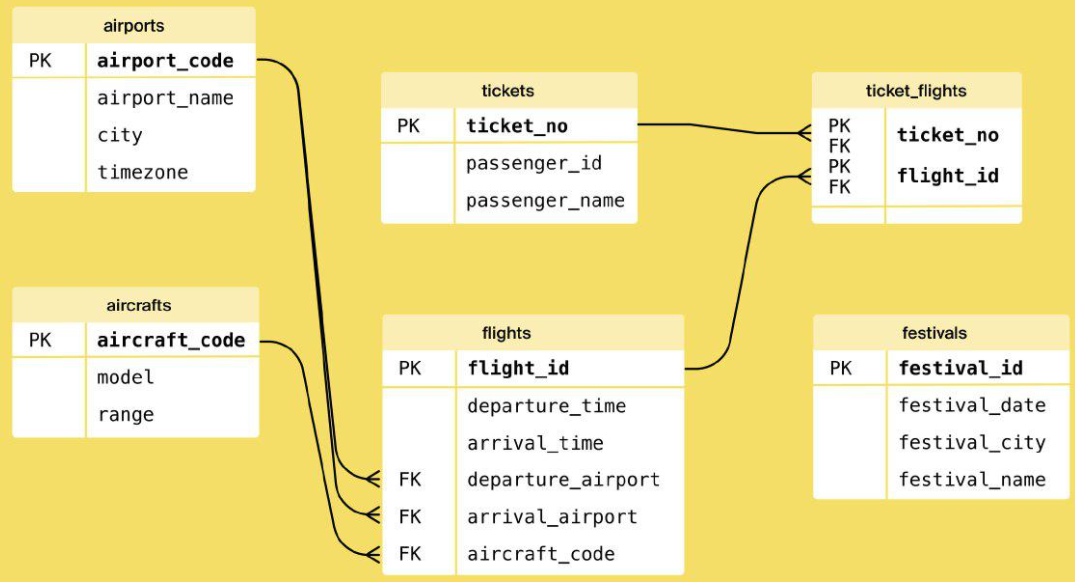
Ссылка на сайт: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

# Нужно:
- импортировать файлы;
- написать парсет для сбора данных;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## Напишите парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года.

In [1]:
import requests
from bs4 import (BeautifulSoup,)
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns

- Напишите парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года.

In [2]:
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)
print(req.text)

<html>
<head>
    <link rel="stylesheet" href="./styles.css">
    <title>
        Festival News
    </title>
</head>
<body>
<h2>Лучшие фестивали по версии Festival News</h2>

<table border="1" cellpadding="5" id="best_festivals">
    <tr>
        <th>Название фестиваля</th>
        <th>Место проведения</th>
        <th>Дата проведения</th>
    </tr>
    <tr class="colored">
        <td>Музыкальный фестиваль «Усадьба Jazz»</td>
        <td>Екатеринбург</td>
        <td>01.07.2018</td>
    </tr>
    <tr>
        <td>Фестиваль музыки и технологий Alfa Future People</td>
        <td>Нижний Новгород</td>
        <td>10.08.2018</td>
    </tr>
    <tr class="colored">
        <td>Фестиваль еды «О, да! Еда!»</td>
        <td>Санкт-Петербург</td>
        <td>21.07.2018</td>
    </tr>
    <tr>
        <td>Доброфест</td>
        <td>Ярославль</td>
        <td>29.07.2018</td>
    </tr>
    <tr class="colored">
        <td>Park Live</td>
        <td>Москва</td>
        <td>28.07.2018</td>
    </tr>

In [3]:
soup=BeautifulSoup(req.text, 'lxml')
table = soup.find('table')

In [4]:
heading_table = [] 
for row in table.find_all('th'): 
        heading_table.append(row.text) 

content=[] 
for row in table.find_all('tr'): 

    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
festivals = pd.DataFrame(content, columns=heading_table)
print(festivals)

                                  Название фестиваля Место проведения  \
0               Музыкальный фестиваль «Усадьба Jazz»     Екатеринбург   
1   Фестиваль музыки и технологий Alfa Future People  Нижний Новгород   
2                        Фестиваль еды «О, да! Еда!»  Санкт-Петербург   
3                                          Доброфест        Ярославль   
4                                          Park Live           Москва   
5                                       Пикник Афиши           Москва   
6                                            VK FEST  Санкт-Петербург   
7                            Фестиваль «О, да! Еда!»          Иркутск   
8                            Фестиваль «О, да! Еда!»      Владивосток   
9                                            Видфест           Москва   
10                                  «Нашествие 2018»            Тверь   

   Дата проведения  
0       01.07.2018  
1       10.08.2018  
2       21.07.2018  
3       29.07.2018  
4       28.07.2018

- Изучите таблицу airports и выведите список городов (city), в которых есть аэропорты.

SELECT
    DISTINCT airports.city
    
FROM
    airports;

- Изучите таблицу flights и подсчитайте количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовите переменную cnt_flights и выведите её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируйте в порядке убывания количества вылетов.

SELECT
    departure_airport,
    
COUNT(flight_id) as cnt_flights
    
FROM
    flights
    
GROUP BY
    departure_airport 
    
ORDER BY
    cnt_flights DESC;

- Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившийся столбец flights_amount и выведите его, также выведите столбец model.

SELECT
    aircrafts.model AS model,
    
COUNT(flights.flight_id) AS flights_amount

FROM
    flights
    
LEFT JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code

WHERE
    CAST(departure_time AS date) < '2018-10-01' 
    AND
    CAST(departure_time AS date) > '2018-08-31'
    
GROUP BY    
    model;

- Посчитайте количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместите в столбец type_aircraft, а количество рейсов — во flights_amount. Выведите их на экран.

SELECT
   COUNT(flights.flight_id) AS flights_amount,
   
CASE WHEN model LIKE 'Airbus%' THEN 'Airbus'

WHEN model LIKE 'Boeing%' THEN 'Boeing'

ELSE 'other'

END AS type_aircraft

FROM
   flights
   
INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code

WHERE
    CAST(departure_time AS date) BETWEEN '2018-09-01' AND '2018-09-30'
    
GROUP BY
    type_aircraft

- Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.

SELECT
    SUBQ.city,
    
AVG(SUBQ.count_flights) as average_flights 

FROM
    (SELECT
        airports.city,
        
EXTRACT(day from flights.arrival_time) as day_number,

COUNT(flights.flight_id) as count_flights

FROM
        flights

LEFT JOIN
        airports ON airports.airport_code = flights.arrival_airport
        
WHERE
        (flights.arrival_time :: date) BETWEEN '2018-08-01' AND '2018-08-31'
        
GROUP BY
        airports.city, day_number) AS SUBQ
        
GROUP BY
    SUBQ.city

- Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

SELECT
    festival_name,
    
EXTRACT(WEEK FROM CAST(festival_date AS date)) AS festival_week

FROM
    festivals
    
WHERE
    festival_city = 'Москва' 
    AND 
    festival_date BETWEEN  '2018-07-23' AND '2018-09-30'

- Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу, в которой будет номер недели; информация о количестве купленных за неделю билетов; номер недели ещё раз, если в эту неделю проходил фестиваль, и nan, если не проходил; а также название фестиваля festival_name.

SELECT
    EXTRACT(week FROM CAST(flights.arrival_time AS date)) AS week_number,
    
COUNT(ticket_flights.ticket_no) AS ticket_amount,

sub.festival_week AS festival_week,

sub.festival_name AS festival_name
    
FROM tickets
    LEFT JOIN ticket_flights ON ticket_flights.ticket_no  = tickets.ticket_no
    
LEFT JOIN flights ON flights.flight_id  = ticket_flights.flight_id

LEFT JOIN airports ON airports.airport_code = flights.arrival_airport

LEFT JOIN
        (SELECT
             festival_name,
             
EXTRACT(WEEK FROM CAST(festival_date AS date)) AS festival_week

FROM
             festivals
             
WHERE
             festival_city = 'Москва' AND festival_date BETWEEN '2018-07-23' AND '2018-09-30') as sub ON sub.festival_week = EXTRACT(week FROM CAST(flights.arrival_time AS date))
WHERE
    airports.city = 'Москва' AND
    CAST(flights.arrival_time AS date) BETWEEN '2018-07-23' AND '2018-09-30'
GROUP BY
    EXTRACT(week FROM CAST(flights.arrival_time AS date)), 
    festival_week, 
    festival_name

## Изучение данных из файла.

Откроем первый файл и изучим его.

In [5]:
data_1 = pd.read_csv('/datasets/query_1.csv')
data_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [7]:
data_1.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [8]:
data_1.duplicated().sum()

0

In [9]:
data_1.describe().T 

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


Датасет состоит из 2 столбцов и 8 строк.Данные красивые,без пропусков и дубликатов,тип данных правильный.

In [10]:
data_2 = pd.read_csv('/datasets/query_3.csv')
data_2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [12]:
data_2.isnull().sum()

city               0
average_flights    0
dtype: int64

In [13]:
for row in data_2: 
    print(data_2[row].value_counts()) 

Усть-Илимск                 1
Махачкала                   1
Череповец                   1
Москва                      1
Южно-Сахалинск              1
                           ..
Петропавловск-Камчатский    1
Петрозаводск                1
Нерюнгри                    1
Новокузнецк                 1
Кемерово                    1
Name: city, Length: 101, dtype: int64
1.000000      12
2.000000       9
3.000000       7
4.000000       4
2.290323       3
2.612903       2
3.290323       2
6.000000       2
5.000000       2
4.290323       2
5.870968       2
3.419355       2
6.032258       2
2.580645       2
6.290323       2
2.161290       2
3.870968       1
17.322581      1
1.580645       1
8.419355       1
4.129032       1
1.357143       1
4.580645       1
5.129032       1
2.451613       1
31.161290      1
6.709677       1
1.294118       1
4.193548       1
9.000000       1
9.612903       1
3.161290       1
8.741935       1
10.000000      1
129.774194     1
6.548387       1
1.548387       1
7.7

In [14]:
data_2.duplicated().sum()

0

In [15]:
data_2.describe().T 

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


Датасет состоит из 2 столбцов и 101 строки.Данные красивые,без пропусков и дубликатов,тип данных правильный.

## Топ 10 городов по количеству рейсов.

In [16]:
top_10_city = data_2.sort_values(by='average_flights', ascending=False).head(10)

In [17]:
top_10_city['average_flights'] = top_10_city['average_flights'].astype('int')
top_10_city

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,11
20,Екатеринбург,11
67,Ростов-на-Дону,10
63,Пермь,10
10,Брянск,10
74,Сочи,9
84,Ульяновск,9


## Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

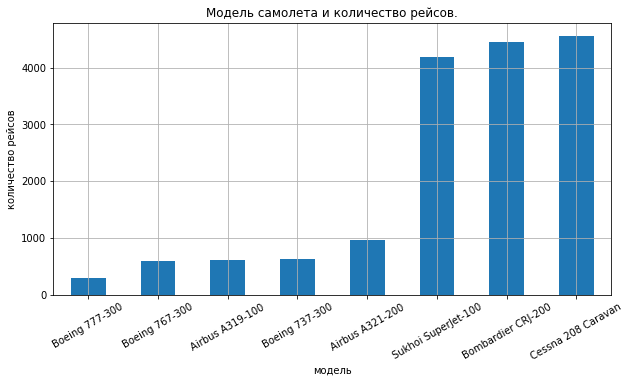

In [18]:
data_1.sort_values(by='flights_amount').plot(x='model', y='flights_amount', kind='bar', grid=True,\
                                             figsize=(10, 5), legend=False)
plt.xticks(rotation=30)
plt.title('Модель самолета и количество рейсов.')
plt.xlabel('модель')
plt.ylabel('количество рейсов')
plt.show()

По количеству рейсов выделяются:

Cessna 208 Caravan(самолет на 13+1 мест) (4557).Он используется,как пасажирский,так и грузовой,это "вездеход",он летает в любую погоду и может приземлиться на бездорожье и даже в воду;

Bombardier CRJ-200(на 50 мест) (4446),

Sukhoi SuperJet-100(от 87 до 108 мест)	(4185).

У них рейсов в разы больше,чем у других самолетов.Остальные меньше 1000 рейсов,но это из-за того,что предоставлены разные модели Boeing b Airbus.

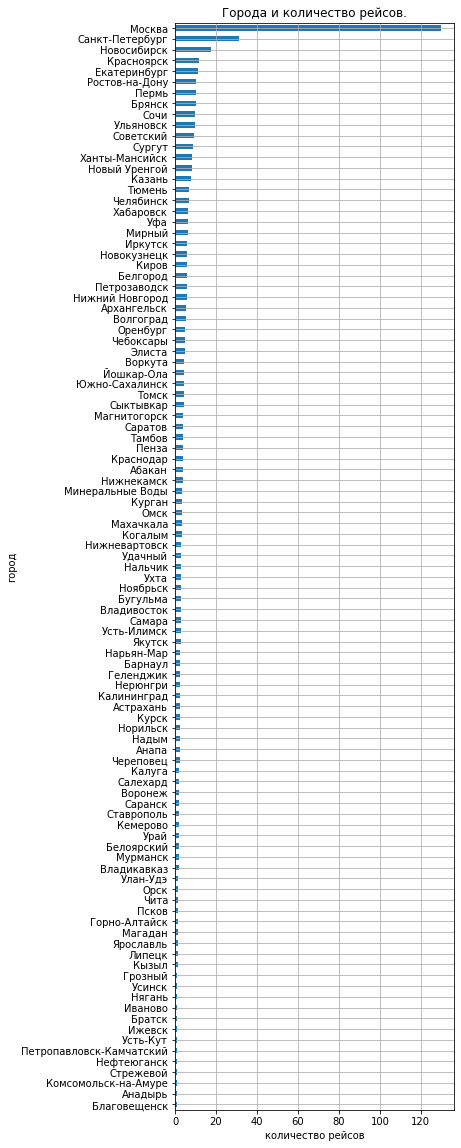

In [19]:
data_2.sort_values(by='average_flights').plot(x='city', y='average_flights', kind='barh', grid=True,\
                                              figsize=(5, 20), legend=False)
plt.title('Города и количество рейсов.')
plt.xlabel('количество рейсов')
plt.ylabel('город')
plt.show()

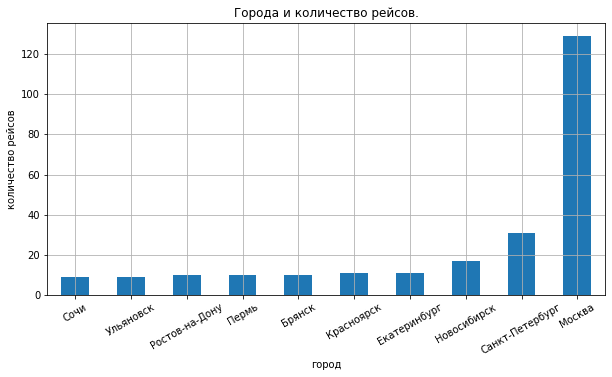

In [20]:
top_10_city.sort_values(by='average_flights').plot(x='city', y='average_flights', kind='bar', grid=True,\
                                                   figsize=(10, 5), legend=False)
plt.xticks(rotation=30)
plt.title('Города и количество рейсов.')
plt.xlabel('город')
plt.ylabel('количество рейсов')
plt.show()

На первом месте Москва(129) с большим отрывом,что неудивительно. На втором Санкт-Петербург(31),на третьем Новосибирск(17),потом идут города с примерно одинаковым количеством рейсов(~10),завершает десятку Ульяновск(9).

## Вывод.

### В основном летают из Москвы,так как там:

1. 3 аэропорта; 

2. высокая плотность населения.

### По количеству рейсов выделяются:

Cessna 208 Caravan(самолет на 13+1 мест) (4557).Он используется,как пасажирский,так и грузовой,это "вездеход",он летает в любую погоду и может приземлиться на бездорожье и даже в воду;

Bombardier CRJ-200(на 50 мест) (4446),

Sukhoi SuperJet-100(от 87 до 108 мест) (4185).

У них рейсов в разы больше,чем у других самолетов.Остальные меньше 1000 рейсов,но это из-за того,что предоставлены разные модели Boeing b Airbus.

### По городам:
На первом месте Москва(129) с большим отрывом,что неудивительно. На втором Санкт-Петербург(31),на третьем Новосибирск(17),потом идут города с примерно одинаковым количеством рейсов(~10),завершает десятку Ульяновск(9).

### Любимые модели самолета:

1. Cessna 208 Caravan(4557);

2. Bombardier CRJ-200(4446);

3. Sukhoi SuperJet-100(4185).
